<a href="https://colab.research.google.com/github/talitmr/OneLayerNetworkwithMNISTClassification/blob/main/One_Layer_Network_Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## One Layer Network for Classification MNIST Dataset

In [ ]:
import torch, torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

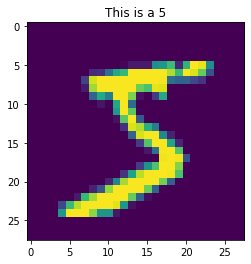

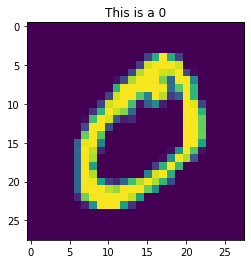

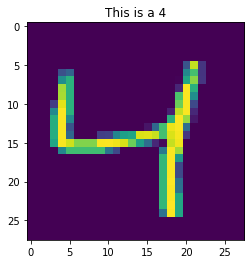

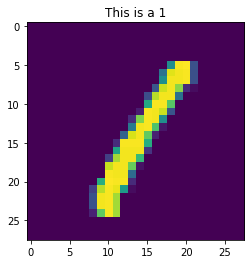

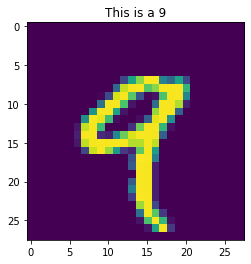

In [ ]:
#The MNIST dataset is about 12 MB and will be downloaded automatically if it is not located in the given path.
mnist = torchvision.datasets.MNIST('./', train=True, download=True, transform=torchvision.transforms.ToTensor())

#Helper for visualization
def torch_imshow(img):
    img = img[0]
    plt.imshow(img.cpu().numpy())
    plt.show()

#Visualize first 5 samples
for n in range(5):
    sample = mnist[n]
    img, label = sample
    plt.figure()
    plt.title(f'This is a {label}')
    torch_imshow(img)


In [ ]:
## Create a dataloader that bundles the dataset with batch size of 16
# You are free to shuffle data or not

train_dataloader = DataLoader(mnist, batch_size=16, shuffle=True, num_workers=4)

In [ ]:
## Create a 1 layer fully connected network without any activation

class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(28*28, 10)
        
    def forward(self, x):
        x = self.layer1(x)
        return x
        
one_layer_net = OneLayerNetwork().cuda()

dummy_input = torch.randn(16, 784, device='cuda') #You can create tensors in GPU directly instead of .cuda()
dummy_output = one_layer_net(dummy_input)

print(f'Dummy input shape: {dummy_input.shape}')
print(f'Dummy output shape: {dummy_output.shape}')

Dummy input shape: torch.Size([16, 784])
Dummy output shape: torch.Size([16, 10])


In [ ]:
# Define an SGD optimizer with learning rate 0.001 to optimize the parameters of "one_layer_net"
sgd_optimizer = torch.optim.SGD(params=one_layer_net.parameters(), lr=0.001)
print(sgd_optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [ ]:
## Decide which loss function to use from torch.nn module and define it below
# Hint: The network does 'not' include a softmax activation at the output.


loss_fn = torch.nn.CrossEntropyLoss() ## FILL HERE ##

In [ ]:
## Warning: If you run this cell multiple times, it will continue training
## after the first run so the plots may not be correct. Make sure you are not
## running this cell twice before restarting kernel.

loss_list = [] #To plot loss graph later

for train_images, train_labels in train_dataloader:
    ## Move data to GPU
    train_images, train_labels = train_images.cuda(), train_labels.cuda()
    
    ## Flatten the images from [BATCH, 1, 28, 28] to [BATCH, 784]
    flat_images = train_images.reshape(-1, 784)
    
    ## Run the network with flattened images batch and obtain the class scores
    class_scores = one_layer_net(flat_images)
    
    ## Calculate loss using the loss_fn defined above
    loss = loss_fn(class_scores, train_labels)
    loss_list.append(loss)
    
    ## Take an optimization step (don't forget to clear the gradients first)

    sgd_optimizer.zero_grad()
    loss.backward()
    sgd_optimizer.step()
    
    
    
    
    
    

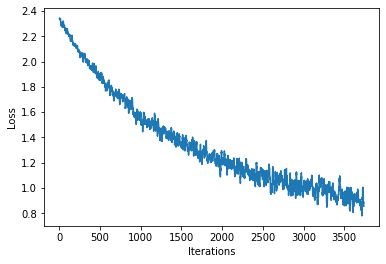

In [ ]:
# Helper for plotting the loss graph smoothly. 
def plot_loss_graph(loss_list):
    filter_size = 10
    moving_average_filter = [1/filter_size] * filter_size
    smoothed_loss_list = np.convolve(loss_list, moving_average_filter, 'valid') 
    plt.figure()
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.plot(smoothed_loss_list)
    
plot_loss_graph(loss_list)

In [ ]:
## Test your network's accuracy on the test set

# Prepare test set
mnist_test = torchvision.datasets.MNIST('./', train=False, download=True, transform=torchvision.transforms.ToTensor())
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=False)


true_predictions = 0
false_predictions = 0
for test_images, test_labels in test_dataloader:
    ## Move batch to GPU
    test_images, test_labels = test_images.cuda(), test_labels.cuda()
    
    ## Flatten the images from [BATCH, 1, 28, 28] to [BATCH, 784]
    flat_images = test_images.reshape(-1, 784)
    
    ## Run the network with flattened images batch and obtain the class scores
    class_scores = one_layer_net(flat_images)

    ## Extract predictions from class_scores using torch.argmax() method
    class_predictions = torch.argmax(class_scores,1) ## FILL HERE ##
    
    ## Find the number of true predictions in the batch using test_labels and class_predictions
    true_predictions_batch  = torch.sum(class_predictions == test_labels)
    false_predictions_batch = torch.sum(class_predictions != test_labels)
    
    true_predictions  += true_predictions_batch.item()
    false_predictions += false_predictions_batch.item()

accuracy = true_predictions / (true_predictions + false_predictions)
print(f'Accuracy = {accuracy*100}%')
     

Accuracy = 83.39%
